In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from livelossplot.tf_keras import PlotLossesCallback

import cv2
import numpy as np
from keras.models import load_model


In [2]:
train_directory = "C:/Users/HP/nndl/database/archive/train/train/"
test_directory = "C:/Users/HP/nndl/database/archive/test/test/"

for expression in os.listdir(train_directory):
    print(str(len(os.listdir(train_directory + expression))) + " " + expression + " images")


3995 angry images
436 disgust images
4097 fear images
7215 happy images
4965 neutral images
4830 sad images
3171 surprise images


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("C:/Users/HP/nndl/database/archive/train/train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("C:/Users/HP/nndl/database/archive/test/test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
# Extract filenames and labels from the train_generator
filenames = train_generator.filenames
labels = train_generator.classes
filepaths = train_generator.filepaths

# Create a DataFrame with filenames and labels
train_data = pd.DataFrame({'Folder_Path': filepaths,'Filename': filenames, 'Label': labels})

# Define a dictionary to map numerical labels to emotion names
label_to_emotion = {
    0: 'angry',
    1: 'disgust',
    2: 'fear',
    3: 'happy',
    4: 'neutral',
    5: 'sad',
    6: 'surprise'
}

# Convert numerical labels to emotion names in the train_data DataFrame
train_data['Label'] = train_data['Label'].map(label_to_emotion)

# Display the DataFrame
print(train_data.head())


                                         Folder_Path  \
0  C:/Users/HP/nndl/database/archive/train/train/...   
1  C:/Users/HP/nndl/database/archive/train/train/...   
2  C:/Users/HP/nndl/database/archive/train/train/...   
3  C:/Users/HP/nndl/database/archive/train/train/...   
4  C:/Users/HP/nndl/database/archive/train/train/...   

                      Filename  Label  
0  angry\Training_10118481.jpg  angry  
1  angry\Training_10120469.jpg  angry  
2  angry\Training_10131352.jpg  angry  
3  angry\Training_10161559.jpg  angry  
4   angry\Training_1021836.jpg  angry  


In [5]:
# shuffle the dataset
train_data = train_data.sample(frac = 1).reset_index(drop=True)
train_data.head()

,Folder_Path,Filename,Label
0,C:/Users/HP/nndl/database/archive/train/train/...,sad\Training_31774022.jpg,sad
1,C:/Users/HP/nndl/database/archive/train/train/...,fear\Training_89549024.jpg,fear
2,C:/Users/HP/nndl/database/archive/train/train/...,neutral\Training_21324994.jpg,neutral
3,C:/Users/HP/nndl/database/archive/train/train/...,neutral\Training_47880233.jpg,neutral
4,C:/Users/HP/nndl/database/archive/train/train/...,sad\Training_46062445.jpg,sad


In [6]:
# Extract filenames and labels from the train_generator
filenames = validation_generator.filenames
labels = validation_generator.classes
filepaths = validation_generator.filepaths

# Create a DataFrame with filenames and labels
test_data = pd.DataFrame({'Folder_Path': filepaths,'Filename': filenames, 'Label': labels})

# Define a dictionary to map numerical labels to emotion names
label_to_emotion = {
    0: 'angry',
    1: 'disgust',
    2: 'fear',
    3: 'happy',
    4: 'neutral',
    5: 'sad',
    6: 'surprise'
}

# Convert numerical labels to emotion names in the validation_data DataFrame
test_data['Label'] = test_data['Label'].map(label_to_emotion)

# Display the DataFrame
print(test_data.head())


                                         Folder_Path  \
0  C:/Users/HP/nndl/database/archive/test/test/an...   
1  C:/Users/HP/nndl/database/archive/test/test/an...   
2  C:/Users/HP/nndl/database/archive/test/test/an...   
3  C:/Users/HP/nndl/database/archive/test/test/an...   
4  C:/Users/HP/nndl/database/archive/test/test/an...   

                         Filename  Label  
0  angry\PrivateTest_10131363.jpg  angry  
1  angry\PrivateTest_10304478.jpg  angry  
2   angry\PrivateTest_1054527.jpg  angry  
3  angry\PrivateTest_10590091.jpg  angry  
4   angry\PrivateTest_1109992.jpg  angry  


<Axes: xlabel='Label', ylabel='count'>

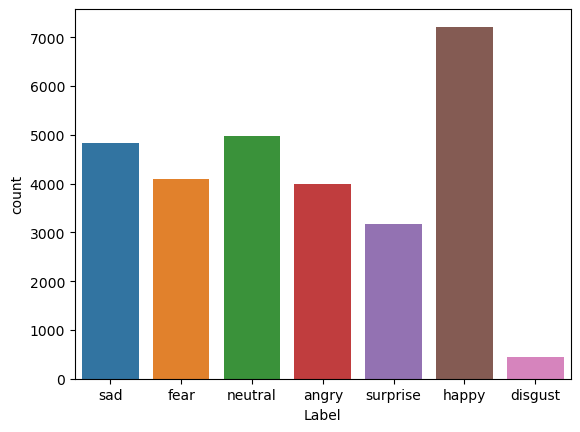

In [7]:
sns.countplot(data=train_data, x='Label')

<Axes: xlabel='Label', ylabel='count'>

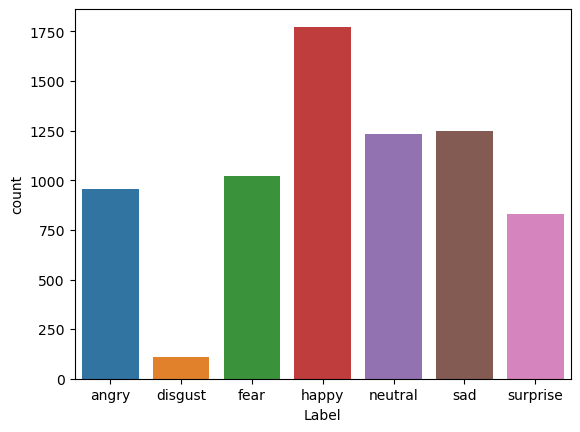

In [8]:
sns.countplot(data=test_data, x='Label')

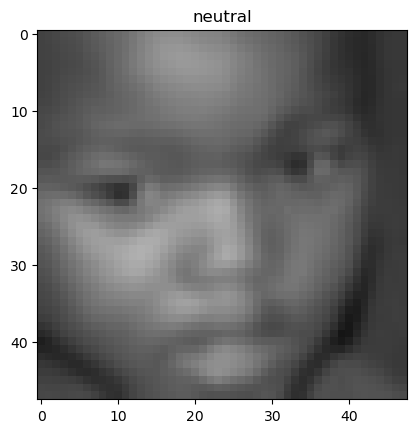

In [9]:
sample_img_path = train_data['Folder_Path'][3]
sample_label = train_data['Label'][3]

sample_img = load_img(sample_img_path)

plt.title(sample_label)
plt.imshow(sample_img)
plt.show()

In [10]:
from PIL import Image
import numpy as np

image_path = train_data['Folder_Path'][0]
pil_image = Image.open(image_path)

# Convert the PIL image to a NumPy array
np_image = np.array(pil_image)

# Get the shape of the NumPy array
height, width, channels = np_image.shape

print("Image shape: ({}, {}, {})".format(height, width, channels))

Image shape: (48, 48, 3)


In [11]:
print(train_data.columns)


Index(['Folder_Path', 'Filename', 'Label'], dtype='object')


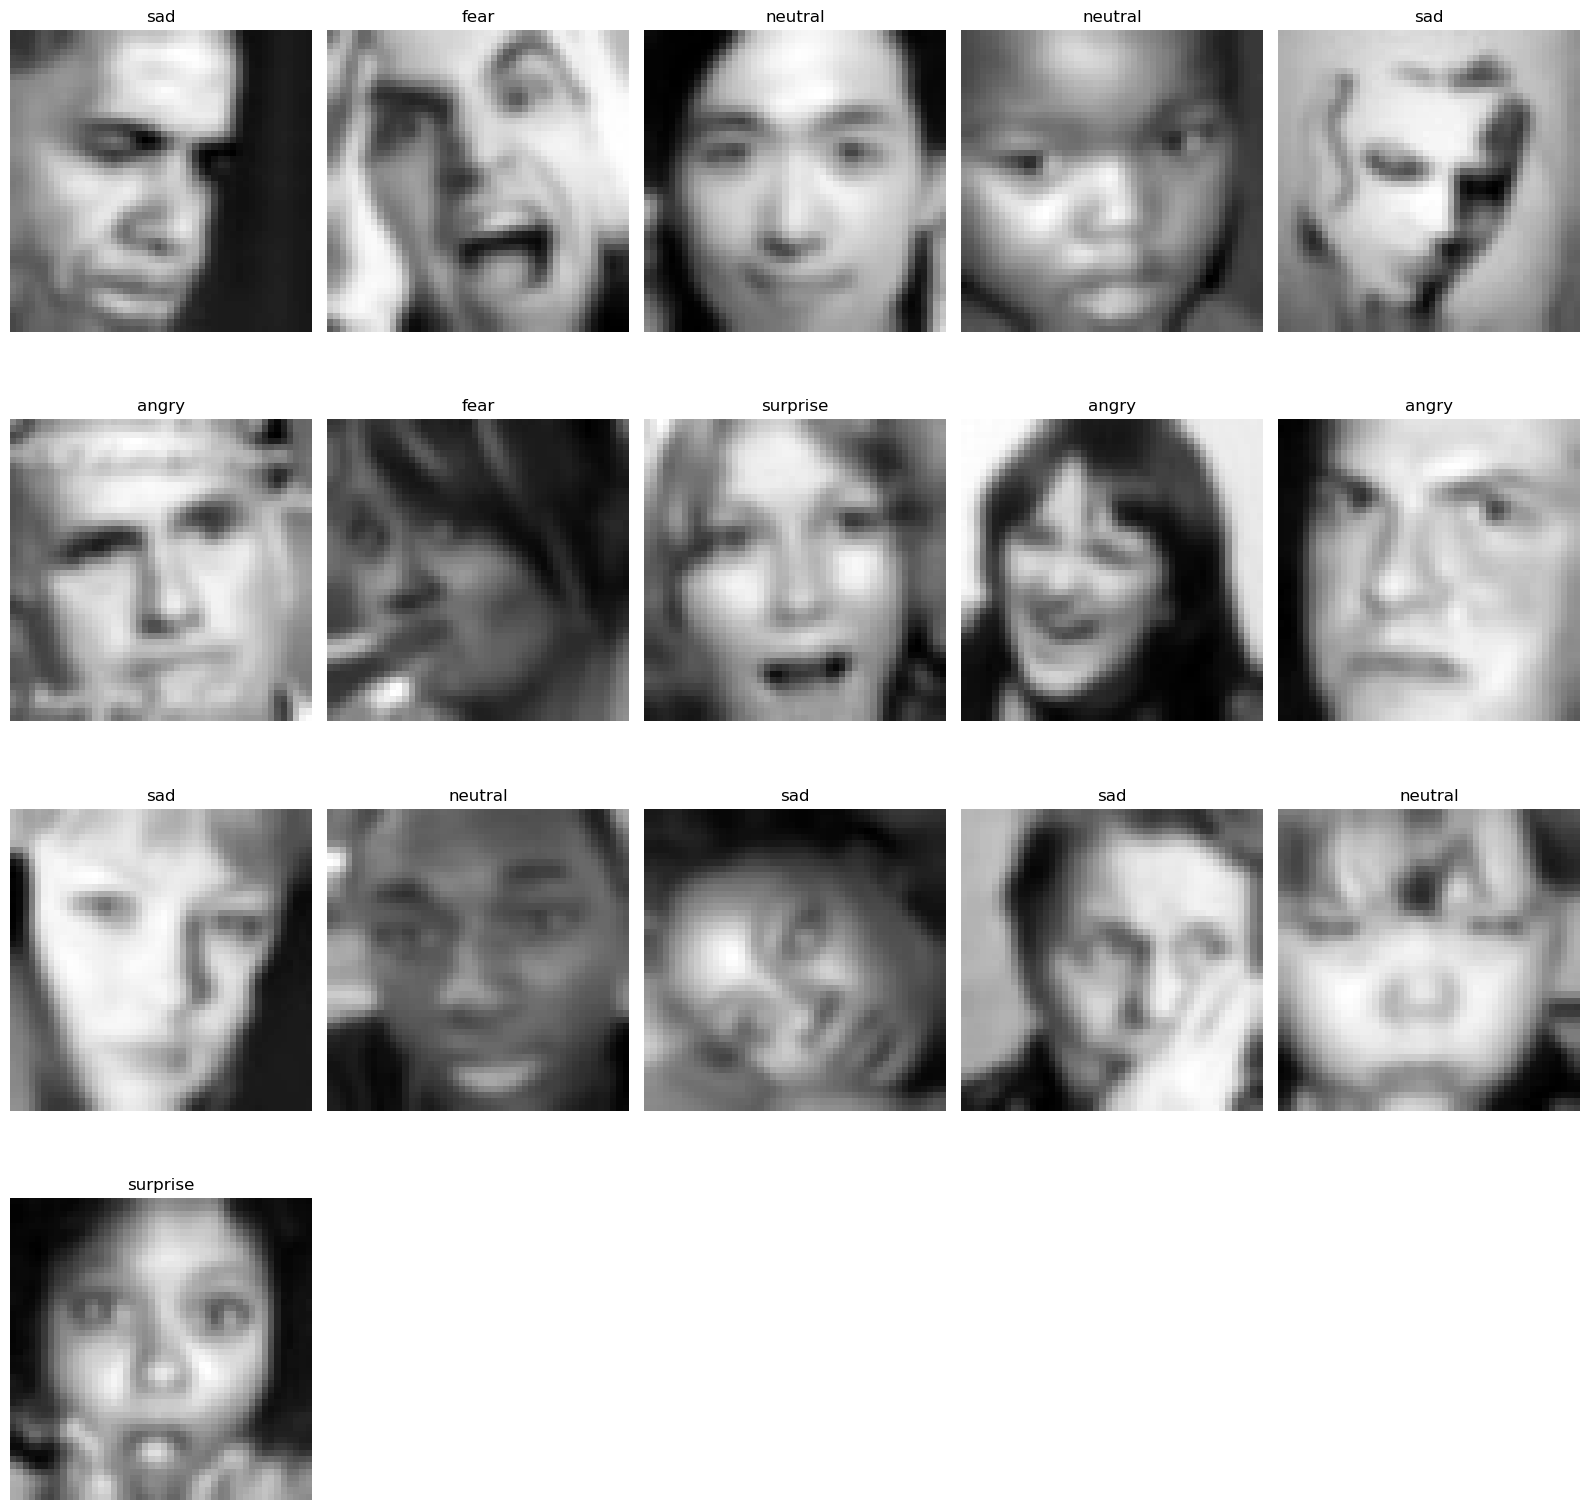

In [12]:
plt.figure(figsize=(16, 16))
sample_imgs = train_data.iloc[0:16]

for idx, row in sample_imgs.iterrows():
    img_path = row['Folder_Path']  # Replace 'Image_Path' with the actual column name containing the image file paths
    label = row['Label']  # Replace 'Label' with the actual column name containing the emotion labels

    plt.subplot(4, 5, idx + 1)  # Adjust the number of columns to fit the number of images
    img = Image.open(img_path).convert("L")  # Load the image and convert it to grayscale
    plt.title(label)
    plt.axis('off')
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()


In [13]:
def read_images(images):
    features=[]
    for img_path in tqdm(images):
        img = load_img(img_path,grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [14]:
X_train = read_images(train_data['Folder_Path'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [15]:
X_test = read_images(test_data['Folder_Path'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [17]:
## normalize the image
X_train = X_train/255.0
X_test = X_test/255.0

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_data['Label'])
y_train = le.transform(train_data['Label'])
y_test = le.transform(test_data['Label'])

In [19]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [21]:
input_shape = (48, 48, 1)
output_class = 7

In [22]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [23]:
history = model.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
225/225 [==============================] - 856s 4s/step - loss: 1.8232 - accuracy: 0.2460 - val_loss: 1.8193 - val_accuracy: 0.2471
Epoch 2/50
225/225 [==============================] - 5757s 26s/step - loss: 1.8019 - accuracy: 0.2511 - val_loss: 1.7861 - val_accuracy: 0.2471
Epoch 3/50
225/225 [==============================] - 570s 3s/step - loss: 1.7342 - accuracy: 0.2868 - val_loss: 1.6521 - val_accuracy: 0.3381
Epoch 4/50
225/225 [==============================] - 596s 3s/step - loss: 1.6707 - accuracy: 0.3333 - val_loss: 1.5808 - val_accuracy: 0.3748
Epoch 5/50
225/225 [==============================] - 650s 3s/step - loss: 1.6250 - accuracy: 0.3606 - val_loss: 1.5401 - val_accuracy: 0.3944
Epoch 6/50
225/225 [==============================] - 590s 3s/step - loss: 1.5903 - accuracy: 0.3776 - val_loss: 1.5102 - val_accuracy: 0.4145
Epoch 7/50
225/225 [==============================] - 613s 3s/step - loss: 1.5686 - accuracy: 0.3897 - val_loss: 1.4830 - val_accuracy: 0.42

In [24]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 256)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 256)       0

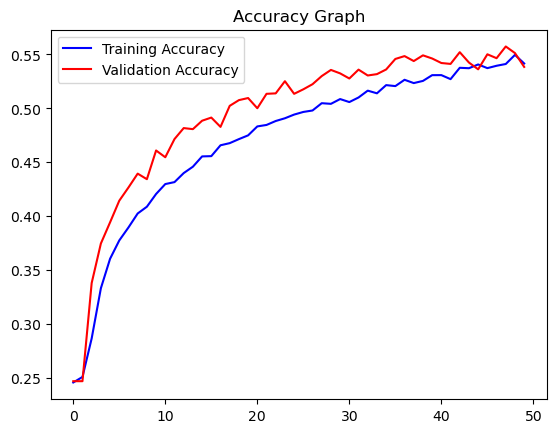

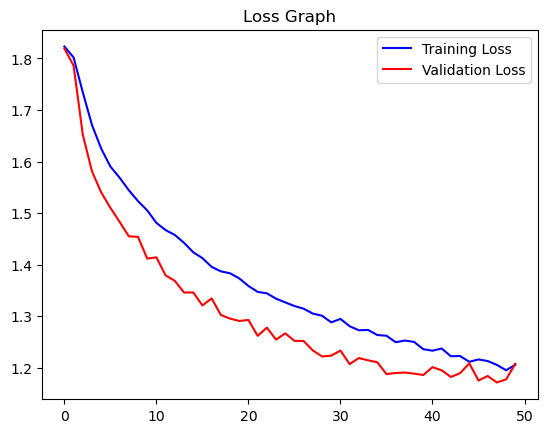

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

True Output:  surprise
1/1 [==============================] - 2s 2s/step
Predicted Output: surprise


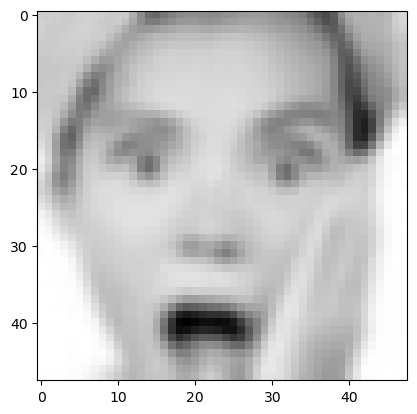

In [26]:
import random
img_idx = random.randint(0,len(test_data))
print("True Output: ",test_data['Label'][img_idx])
pred = model.predict(X_test[img_idx].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(X_test[img_idx].reshape(48, 48), cmap='gray');

In [27]:
model.save("model.h5")


In [28]:
# Load the trained model
model = load_model("model.h5")


In [30]:
import cv2
import numpy as np
import time
import threading
from mtcnn import MTCNN

# Load the trained expression recognition model
from keras.models import load_model

# Define the emotions list
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Initialize the MTCNN face detector
detector = MTCNN()

# Initialize the expression recognition model
model = load_model('C:/Users/HP/nndl/model.h5')

# Set up video capture
cap = cv2.VideoCapture(0)
cap.set(3, 640)  # Width
cap.set(4, 480)  # Height

# Create a lock for frame processing
frame_lock = threading.Lock()

# Initialize variables for display frame rate control
display_fps = 10
frame_interval = 1 / display_fps
last_display_time = 0

# Function to process frames and detect expressions
def process_frames():
    global last_display_time

    while True:
        ret, frame = cap.read()

        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector.detect_faces(frame)

        for face in faces:
            x, y, w, h = face['box']
            confidence = face['confidence']

            if confidence > 0.5:
                face_roi = gray[y:y+h, x:x+w]
                face_roi = cv2.resize(face_roi, (48, 48))
                face_roi = np.expand_dims(face_roi, axis=0)
                face_roi = face_roi.astype('float32') / 255.0

                prediction = model.predict(face_roi)
                label_index = np.argmax(prediction)
                emotion_label = emotions[label_index]

                with frame_lock:
                    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
                    cv2.putText(frame, str(emotion_label), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        current_time = time.time()
        if current_time - last_display_time >= frame_interval:
            with frame_lock:
                cv2.imshow('Real-Time Face Expression Detection', frame)
                last_display_time = current_time

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Start the frame processing thread
frame_thread = threading.Thread(target=process_frames)
frame_thread.start()

# Wait for the frame processing thread to finish
frame_thread.join()

# Release the video capture and close the window
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 179ms/step
